Sometimes we want to be able to combine several different criteria to select
elements from arrays or tables.

So far we have used *boolean* Series and arrays to select rows.  This works fine when we have some simple criterion, such as whether the value in the column or array is greater than 10.

For example, consider the [students ratings dataset]({{ site.baseurl
}}/data/rate_my_professors) dataset. Download the data file via
[disciplines_SI.xlsx]({{ site.baseurl }}/data/disciplines_SI.xlsx).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')

In [2]:
# Read the Excel format data file
ratings = pd.read_excel('disciplines_SI.xlsx')
ratings.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
2,Biology,11774,3.608331,3.701530,3.657641,2.710459
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803


We can select the rows from this table where the Easiness rating was above the median, using a *boolean series*:

In [3]:
easiness = ratings['Easiness']
is_gt_median = easiness > np.median(easiness)
is_gt_median.head()

0    False
1    False
2    False
3     True
4    False
Name: Easiness, dtype: bool

In [4]:
above_median = ratings[is_gt_median]
above_median.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
6,Communications,6940,3.867349,3.878602,3.875019,3.379829
11,Sociology,4839,3.740980,3.748169,3.746962,3.395819
14,Languages,3867,3.772780,3.917949,3.846951,3.277406
17,Anthropology,2598,3.693222,3.704761,3.701674,3.248045


What if we wanted to select the rows that were between the 25th and 75th
percentile?  Here's how to get the percentile values.

In [5]:
q25 = np.quantile(easiness, 0.25)
q75 = np.quantile(easiness, 0.75)
print(q25, q75)

3.0283298724604153 3.34694063174731


We can do this more neatly with [unpacking](using_minimize):

In [6]:
q25, q75 = np.quantile(easiness, [0.25, 0.75])
print(q25, q75)

3.0283298724604153 3.34694063174731


Now we want to select the rows where the Easiness score is between these
values.   We can do this the long way round, by selecting twice:

In [7]:
# Select values above the 25th percentile.
above_q25 = ratings[easiness > q25]
# There are now fewer Easiness values, so we have to get the values remaining.
q25_easiness = above_q25['Easiness']
# Select values below the 75th percentile.
between_25_75 = above_q25[q25_easiness < q75]
between_25_75.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803
7,Business,6120,3.640327,3.680503,3.663332,3.172033


Another, neater way of doing this is to make a single Boolean Series that has
True only if the Easiness value is *both* above the 25th percentile *and*
below the 75th percentile.

This is called a *logical and*.

To do this we can make a Boolean Series for each of these two criteria:

In [8]:
# True if Easiness is above 25th percentile.
is_gt_q25 = easiness > q25
# Show the first 10 values
is_gt_q25.head(10)

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
8     True
9    False
Name: Easiness, dtype: bool

In [9]:
# True if Easiness is below 75th percentile.
is_lt_q75 = easiness < q75
# Show the first 10 values
is_lt_q75.head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: Easiness, dtype: bool

We can combine these two with Numpy functions.  The function we need in this
case is `np.logical_and`.

`np.logical_and` can work on Pandas Series, or on Numpy arrays.   We will use
the term *sequence* for something that can be a Pandas Series or a Numpy
array.

`np.logical_and` combines the two input sequences into a new sequence that
only has True in positions where *both* of the input sequences have a True in
the corresponding position:

In [10]:
is_between_25_75 = np.logical_and(is_gt_q25, is_lt_q75)
is_between_25_75.head(10)

0     True
1     True
2    False
3     True
4     True
5    False
6    False
7     True
8     True
9    False
Name: Easiness, dtype: bool

It might be easier to see what is going on if we make some small test arrays:

In [11]:
a = np.array([True, True, False, False])
b = np.array([True, False, True, False])

We can show these conveniently as a DataFrame:

In [12]:
ab = pd.DataFrame()
ab['first input'] = a
ab['second input'] = b
ab

,first input,second input
0,True,True
1,True,False
2,False,True
3,False,False


Before you look, try to work out what you would get from `np.logical_and(a,
b)`.

Remember, the rule is, the result will have True where the corresponding
element from *both* `a` and `b` are True, and False otherwise.

Here's something to keep you entertained while you are thinking:

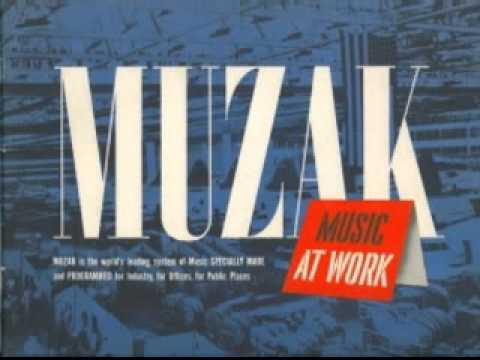

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("gdJWZxPW45c")

The result:

In [14]:
np.logical_and(a, b)

array([ True, False, False, False])

Here are the two input columns and the result, displayed as a data frame, to
show them nicely:

In [15]:
ab['and result'] = np.logical_and(a, b)
ab

,first input,second input,and result
0,True,True,True
1,True,False,False
2,False,True,False
3,False,False,False


Check that you agree with Python's results for combining `is_gt_q25` and
`is_lt_q75` in the same way.  Here's a display showing `is_gt_q25`,
`is_lt_q75` and the result of `logical_and`:

In [16]:
qbools = pd.DataFrame()
qbools['is_gt_q25'] = is_gt_q25
qbools['is_lt_q75'] = is_lt_q75
qbools['and_result'] = np.logical_and(is_gt_q25, is_lt_q75)
qbools.head(10)

,is_gt_q25,is_lt_q75,and_result
0,True,True,True
1,True,True,True
2,False,True,False
3,True,True,True
4,True,True,True
5,False,True,False
6,True,False,False
7,True,True,True
8,True,True,True
9,False,True,False


We can use the combined Boolean series from `logical_and` to select the rows
that we want:

In [17]:
betweeners = ratings[np.logical_and(is_gt_q25, is_lt_q75)]
betweeners.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803
7,Business,6120,3.640327,3.680503,3.663332,3.172033


Notice that we only have rows where there is a corresponding True value in the
result of the `logical_and`, and therefore, that we only have rows that are
above the 25th percentile, and below the 75th percentile.

You may not be surprised to know there is an equivalent function to
`logical_and` called `logical_or`.  Like `logical_and` this returns a Boolean
sequence of the same length as the input sequences.  There is a True in the
output sequence where *one or both* of the input sequences have True in the
corresponding positions.

In [18]:
a

array([ True,  True, False, False])

In [19]:
b

array([ True, False,  True, False])

In [20]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [21]:
ab['or result'] = np.logical_or(a, b)
ab

,first input,second input,and result,or result
0,True,True,True,True
1,True,False,False,True
2,False,True,False,True
3,False,False,False,False


We can use this function to find all the rows that have Easiness ratings above
the 75th percentile or below the 25th percentile:

In [22]:
easy_or_hard = ratings[np.logical_or(easiness < q25, easiness > q75)]
easy_or_hard.head()

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
2,Biology,11774,3.608331,3.701530,3.657641,2.710459
5,Chemistry,7346,3.387174,3.538980,3.465485,2.652054
6,Communications,6940,3.867349,3.878602,3.875019,3.379829
9,Economics,5540,3.382735,3.483617,3.435038,2.910078
11,Sociology,4839,3.740980,3.748169,3.746962,3.395819
